In [3]:
import cv2
import torch
import seaborn as sns
from depth_anything_v2.depth_anything_v2.dpt import DepthAnythingV2

DEVICE = 'cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'
model_configs = {'vitb': {'encoder': 'vitb', 'features': 128, 'out_channels': [96, 192, 384, 768]}}
encoder = 'vitb'

model = DepthAnythingV2(**model_configs[encoder])
model.load_state_dict(torch.load(f'checkpoints/depth_anything_v2_{encoder}.pth', map_location='cpu'))
model = model.to(DEVICE).eval()

raw_img = cv2.imread('./img/9.jpg')
depth = model.infer_image(raw_img) # HxW raw depth map in numpy
depth = abs(depth - depth.max())

<Axes: >

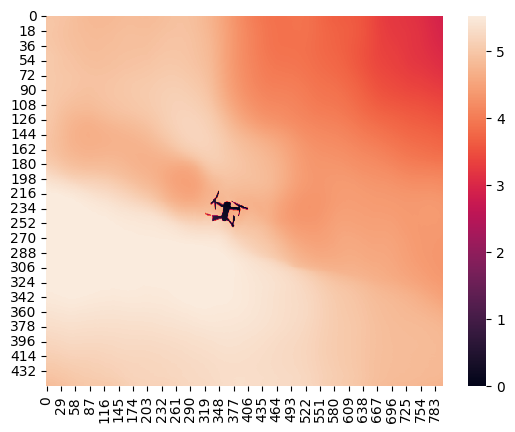

In [9]:
raw_img = cv2.imread('./img/53.jpg')
resized = resized = cv2.resize(raw_img, None, fx=5, fy=5, interpolation=cv2.INTER_CUBIC)
depth = model.infer_image(raw_img) # HxW raw depth map in numpy

depth2 = abs(depth - depth.max())
sns.heatmap(depth2)


In [13]:
depth_normalized = cv2.normalize(depth2, None, 0, 255, cv2.NORM_MINMAX)
depth_uint8 = depth_normalized.astype('uint8')

# Apply a colormap
depth_colormap = cv2.applyColorMap(depth_uint8, cv2.COLORMAP_MAGMA)

# Show the depth map
cv2.imshow('Depth Map', depth_colormap)
cv2.waitKey(0)
cv2.destroyAllWindows()